## Logistic Regression

In this practice, we will use the same data sets we have used in [Linear Discriminant Analysis practice notebook](Linear_Discriminant_Analysis.ipynb) to demonstrate the concept of linear separability. Take a look at that practice first if you haven't done so yet. 

We will start with the first data set that has two linearly separable classes. 

In [14]:
points_data1 <- read.csv("/dsa/data/all_datasets/toydata/data1.csv",header=TRUE)

# For logistic regression, we need to change the class labels from -1 and 1 to 0 and 1. 
points_data1$class[points_data1$class == -1] <- 0
str(points_data1)

'data.frame':	150 obs. of  3 variables:
 $ X    : num  4.92 2.2 2.38 4.37 2.08 ...
 $ Y    : num  3.31 2.76 2.27 2.68 2.19 ...
 $ class: num  1 1 1 1 1 1 1 1 1 1 ...


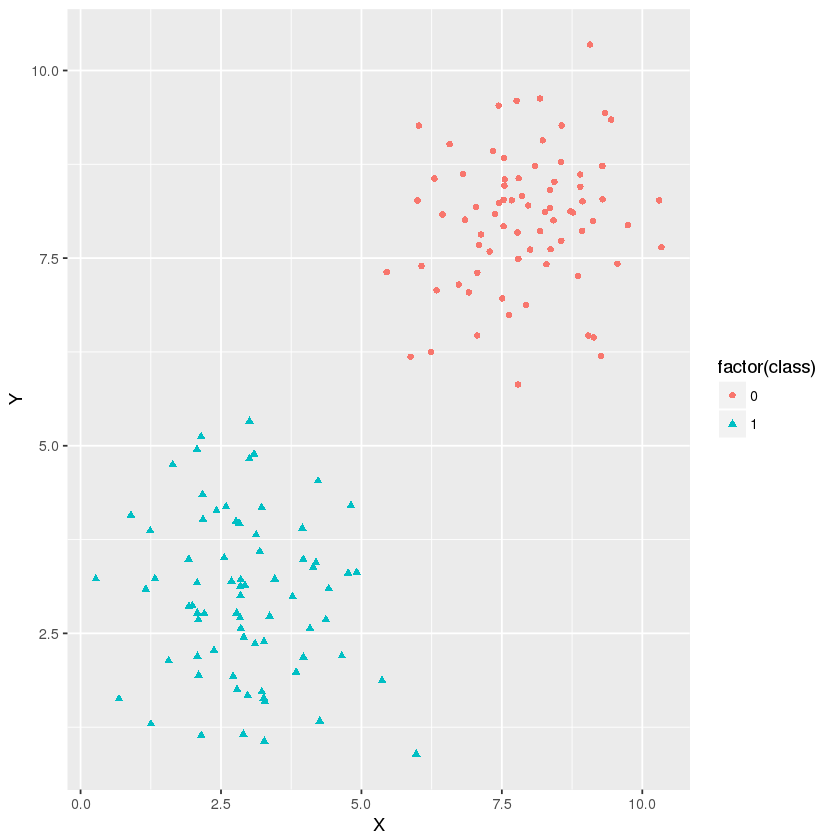

In [15]:
# Visualize the data
library(ggplot2)
plot1 <- ggplot(points_data1, aes(X, Y)) + geom_point(aes(colour=factor(class),shape=factor(class))) #+ theme(legend.position="none")
plot1

The classes labeled as "0" and "1" are *linearly separable*; we can draw a linear decision boundary to separate them. Let's apply the logistic regression (LR) to this data set. 

In [16]:
glmfit1 = glm(class ~ X + Y, data=points_data1, family=binomial)

summary(glmfit1)

Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:
glm(formula = class ~ X + Y, family = binomial, data = points_data1)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-5.127e-05  -2.100e-08   0.000e+00   2.100e-08   3.684e-05  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)   135.33   78084.64   0.002    0.999
X             -10.16   16004.61  -0.001    0.999
Y             -15.54   17089.11  -0.001    0.999

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2.0794e+02  on 149  degrees of freedom
Residual deviance: 5.1478e-09  on 147  degrees of freedom
AIC: 6

Number of Fisher Scoring iterations: 25


You may get a warning about algorithm not converging and probabilities being 0 or 1. Interestingly, if we have a perfectly separable classes in a data set, LR throws this warning because there are infinitely many decision lines that can be drawn between the classes for this data set; LR does not converge to an optimal solution, because optimal solutions are infinitely many. Still, it finds a decision boundary. 

Let's draw the decision boundary of the LR model on the data. To do that, we'll need to figure out the slope and the intercept of the decision boundary line from the model's coefficients. Lets see how to calculate slope and intercept for this decision boundary.

The hypothesis for logistic regression takes the form of:

$$h_\theta = g(z)$$

where, $g(z)$ is the **[sigmoid function](../../module5/labs/Logistic_Regression.ipynb#Logistic_Function)** and where $z$ is of the form:

$$z = \theta_0 + \theta_1x_1 + \theta_2x_2$$

Given we are classifying between 0 and 1, $y=1$ when $h_\theta \ge 0.5$ which given the sigmoid function is true when:

$$ \theta_0 + \theta_1x_1 + \theta_2x_2  \ge 0$$

the above is the decision boundary and can be rearranged as:


$$x_2 \ge \frac{-\theta_0}{\theta_2} + \frac{-\theta_1}{\theta_2}x_1$$

This is an equation in the form of $y=mx+b$ and you can see then why $m$ and $b$ are calculated the way they are in the below piece of code.

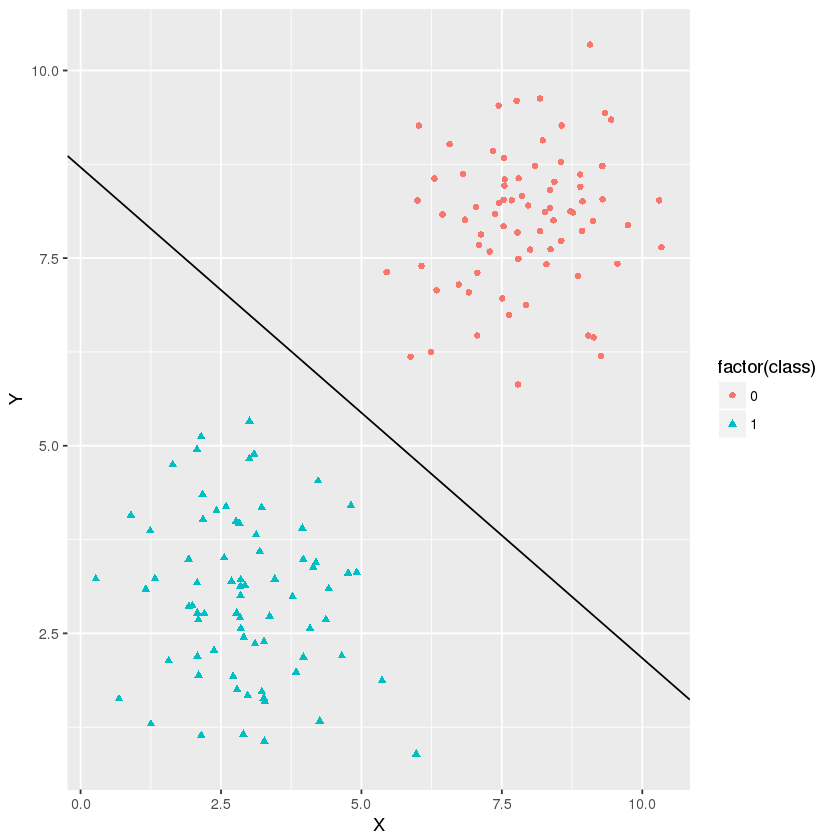

In [17]:
glm_slope1 <- coef(glmfit1)[2]/(-coef(glmfit1)[3])
glm_intercept1 <- coef(glmfit1)[1]/(-coef(glmfit1)[3])

plot1 + geom_abline(slope=glm_slope1, intercept=glm_intercept1)

It can separate two classes; they are *linearly separable*. Logistic Regression is also a *linear classifier* like LDA; it finds a decision line in two dimensions, a decision plane in three dimensions, and a decision hyperplane for dimensions higher than three. 

Now, let's compute a confusion table similar to what we have done in LDA practice. 

In [18]:
# Run the model on the same data that it was trained with and get the probabilities for each sample. 
glm1.probs <- predict(glmfit1, type="response")
# create an array to hold predictions and assign all zeros initially.
glm1.pred = rep(0,length(glm1.probs))
# based on model's probablities for each sample, assign the class label.
glm1.pred[glm1.probs>0.5] <- 1

# Create a confusion table.
conftable1 <- table(glm1.pred, points_data1$class)
conftable1

         
glm1.pred  0  1
        0 75  0
        1  0 75

We can see that there is no confusion between classes; accuracy is 100% (occasionally, you can have a few misclassified points; that is because a random new data set will be created every time you run the code, and a few points may end up too close to the other class).

Let's apply LR to the second data set where the classes can't be separated without making some errors. Here, the samples of different classes will be very closely located so that you can't find a linear separation without misclassifying some of them. 

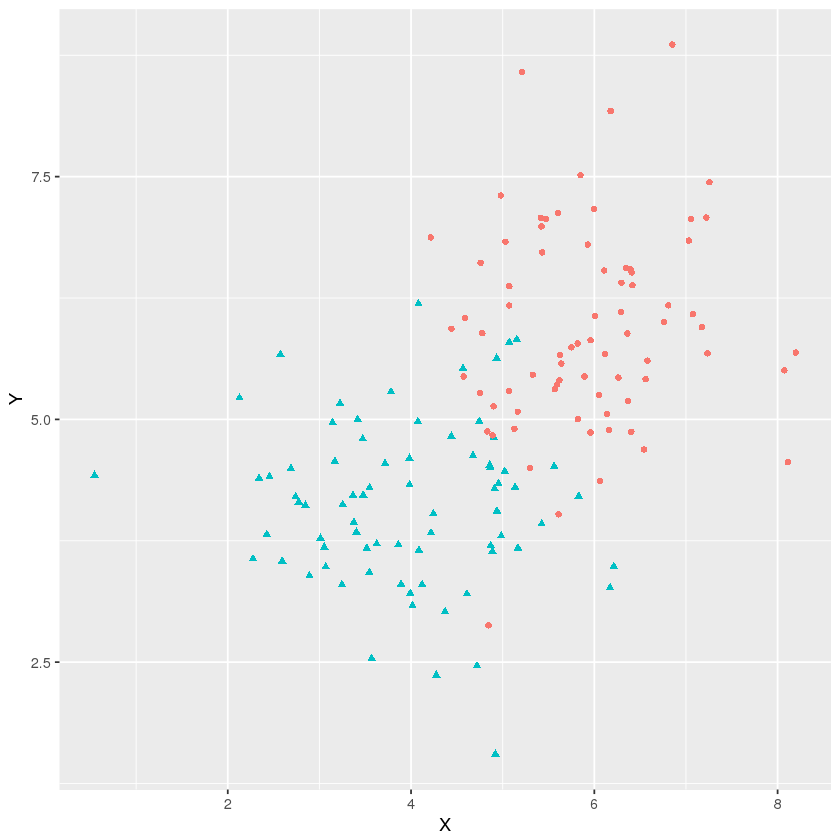

In [21]:
points_data2 <- read.csv("/dsa/data/all_datasets/toydata/data2.csv",header=TRUE)

# For logistic regression, we need to change the class labels from -1 and 1 to 0 and 1. 
points_data2$class[points_data2$class == -1] <- 0
# Visualize the data
plot2 <- ggplot(points_data2, aes(X, Y)) + geom_point(aes(colour=factor(class),shape=factor(class))) + theme(legend.position="none")
plot2

In the above plot, you can see that there is an overlap between classes. This means that some of the samples of a class will be misclassified as the other class; these samples will be on the wrong side of the decision boundary. Let's see that. 


Call:
glm(formula = class ~ X + Y, family = binomial, data = data2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1058  -0.1793   0.0001   0.1218   2.1050  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  23.1921     4.6640   4.973 6.61e-07 ***
X            -2.5569     0.6167  -4.146 3.38e-05 ***
Y            -2.0799     0.4727  -4.400 1.08e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 207.944  on 149  degrees of freedom
Residual deviance:  57.742  on 147  degrees of freedom
AIC: 63.742

Number of Fisher Scoring iterations: 7


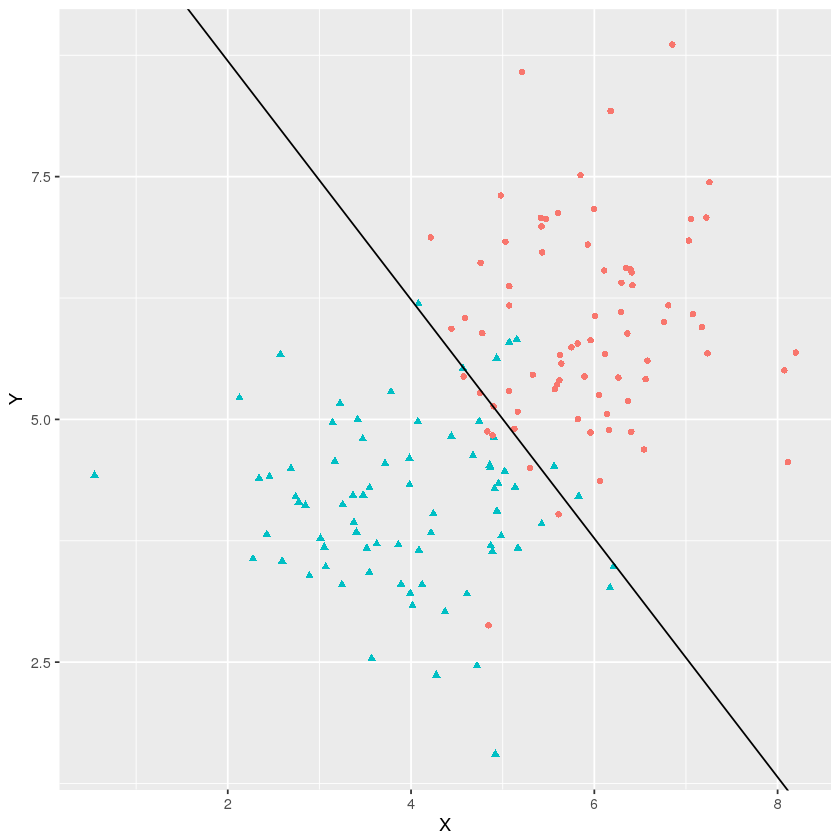

In [22]:
glmfit2 = glm(class ~ X + Y, data=data2, family=binomial)
summary(glmfit2)
glm_slope2 <- coef(glmfit2)[2]/(-coef(glmfit2)[3])
glm_intercept2 <- coef(glmfit2)[1]/(-coef(glmfit2)[3]) 

plot2 + geom_abline(slope=glm_slope2, intercept=glm_intercept2)

The LR model did not throw a warning; it converged to an optimal solution. The classifier does a good job, but not without mistakes. Let's compute confusion table and the accuracy:

In [23]:
# Run the model on the same data that it was trained with and get the probabilities for each sample. 
glm2.probs <- predict(glmfit2, type="response")
# create an array to hold predictions and assign all zeros initially.
glm2.pred = rep(0,length(glm2.probs))
# based on model's probablities for each sample, assign the class label.
glm2.pred[glm2.probs>0.5] <- 1
# Create a confusion table.
conftable2 <- table(glm2.pred, points_data2$class)
conftable2
print (paste("accuracy = ",sum(diag(conftable2))/length(glm2.pred)))

         
glm2.pred  0  1
        0 68  6
        1  7 69

[1] "accuracy =  0.913333333333333"


Now, we will apply the same to the third data set where classes are not linearly separable. 
**It's your turn:**

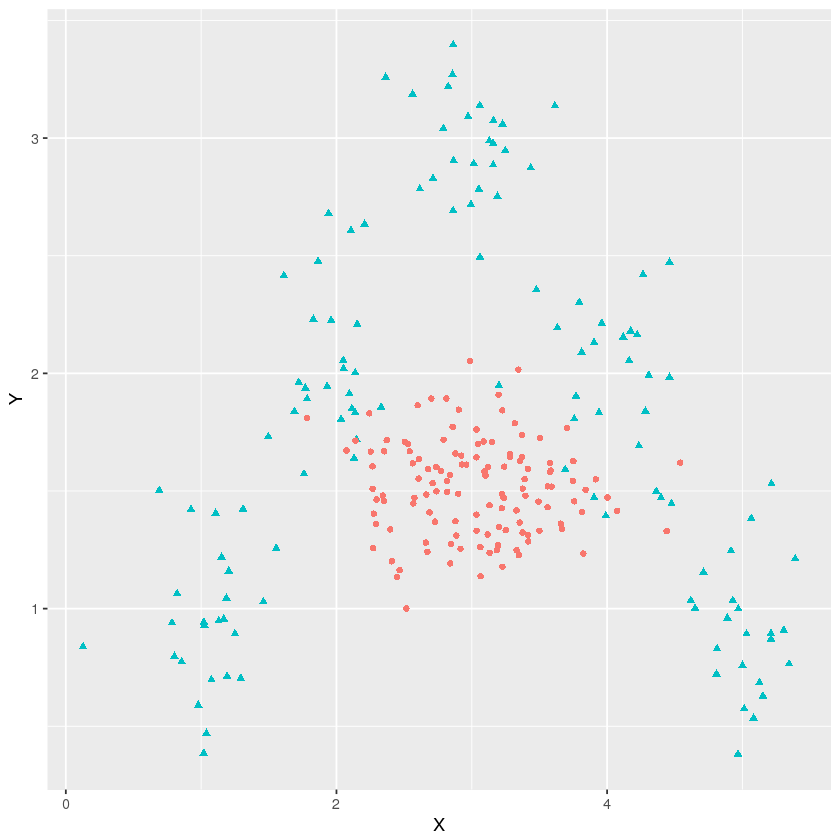

In [24]:
points_data3 <- read.csv("/dsa/data/all_datasets/toydata/data3.csv",header=TRUE)

# For logistic regression, we need to change the class labels from -1 and 1 to 0 and 1. 
points_data3$class[points_data3$class == -1] <- 0
# Visualize the data
plot3 <- ggplot(points_data3, aes(X, Y)) + geom_point(aes(colour=factor(class),shape=factor(class))) + theme(legend.position="none")
plot3


Call:
glm(formula = class ~ X + Y, family = binomial, data = points_data3)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3137  -1.1351  -0.1502   1.1205   1.6137  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.19312    0.54591  -2.186 0.028848 *  
X           -0.01635    0.12198  -0.134 0.893344    
Y            0.75854    0.22814   3.325 0.000885 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 346.57  on 249  degrees of freedom
Residual deviance: 334.43  on 247  degrees of freedom
AIC: 340.43

Number of Fisher Scoring iterations: 4


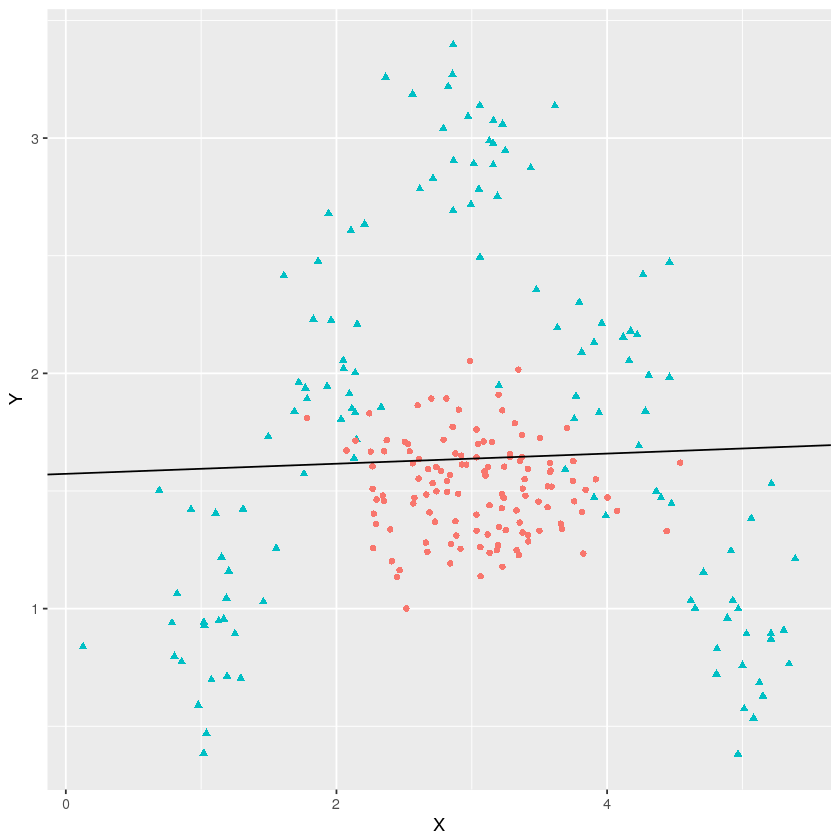

In [25]:
# find model and draw decision boundary
glmfit3 = glm(class ~ X + Y, data=points_data3, family=binomial)
summary(glmfit3)
glm_slope3 <- coef(glmfit3)[2]/(-coef(glmfit3)[3])
glm_intercept3 <- coef(glmfit3)[1]/(-coef(glmfit3)[3]) 

plot3 + geom_abline(slope=glm_slope3, intercept=glm_intercept3)

In [26]:
# Run the model on the same data that it was trained with and get the probabilities for each sample. 
glm3.probs <- predict(glmfit3, type="response")
# create an array to hold predictions and assign all zeros initially.
glm3.pred = rep(0,length(glm3.probs))
# based on model's probablities for each sample, assign the class label.
glm3.pred[glm3.probs>0.5] <- 1
# Create a confusion table.
conftable3 <- table(glm3.pred, points_data3$class)
conftable3
# Compute accuracy
print (paste("accuracy = ",sum(diag(conftable3))/length(glm3.pred)))

         
glm3.pred  0  1
        0 90 56
        1 35 69

[1] "accuracy =  0.636"


You can see that LR can not classify this data set successfully; there are many misclassifications (classes are confused for each other). These classes are *not linearly separable*. 

Now, apply the same to the "XOR pattern" data set where we have two classes that are linearly nonseparable even though their samples seem to be nicely separated in the plot. 

**Again, it's your turn.** It seems like a lot of repetitions of the same thing for different data sets; would like to convert your code above to a function and just call it here for data set *data4.csv* ? 

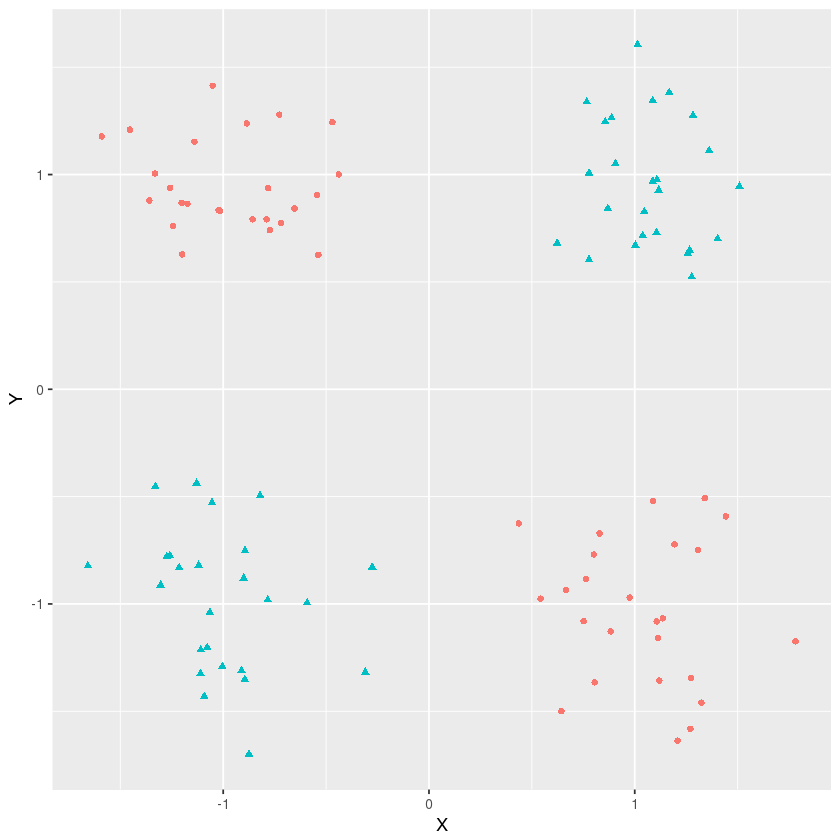

In [27]:
points_data4 <- read.csv("/dsa/data/all_datasets/toydata/data4.csv",header=TRUE)

# For logistic regression, we need to change the class labels from -1 and 1 to 0 and 1. 
points_data4$class[points_data4$class == -1] <- 0
# Visualize the data
plot4 <- ggplot(points_data4, aes(X, Y)) + geom_point(aes(colour=factor(class),shape=factor(class))) + theme(legend.position="none")
plot4


Call:
glm(formula = class ~ X + Y, family = binomial, data = points_data4)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.19735  -1.17448   0.00017   1.17340   1.19998  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept)  0.0008415  0.2001760   0.004    0.997
X           -0.0006719  0.1892805  -0.004    0.997
Y            0.0320076  0.1953901   0.164    0.870

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 138.63  on 99  degrees of freedom
Residual deviance: 138.60  on 97  degrees of freedom
AIC: 144.6

Number of Fisher Scoring iterations: 3


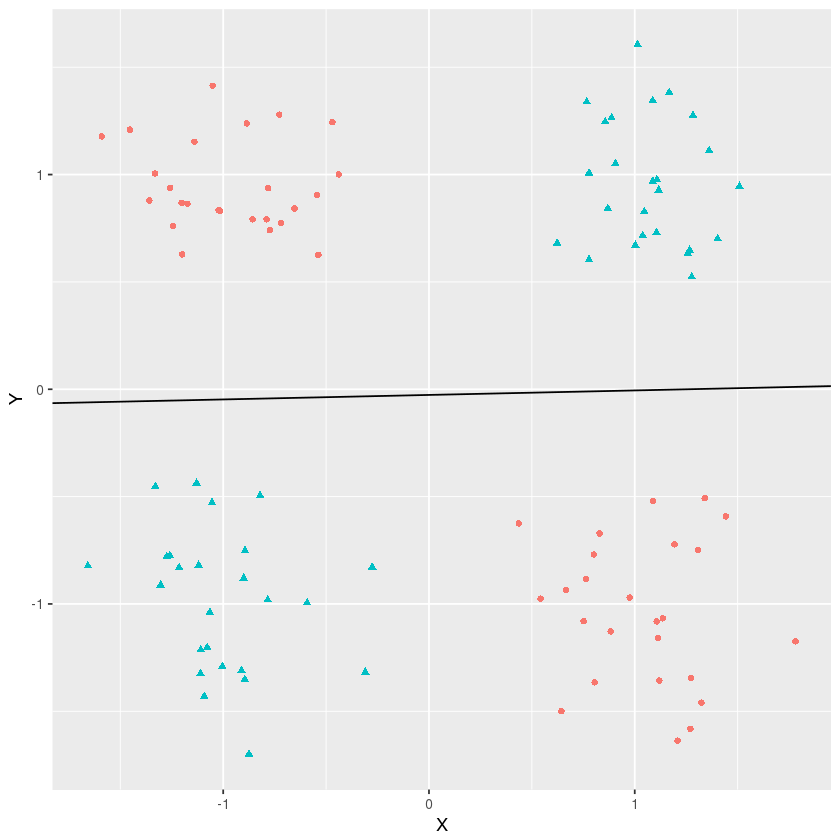

In [28]:
# find model and draw decision boundary
glmfit4 = glm(class ~ X + Y, data=points_data4, family=binomial)
summary(glmfit4)
glm_slope4 <- coef(glmfit4)[2]/(-coef(glmfit4)[3])
glm_intercept4 <- coef(glmfit4)[1]/(-coef(glmfit4)[3]) 

plot4 + geom_abline(slope=glm_slope4, intercept=glm_intercept4)

In [29]:
# Run the model on the same data that it was trained with and get the probabilities for each sample. 
glm4.probs <- predict(glmfit4, type="response")
# create an array to hold predictions and assign all zeros initially.
glm4.pred = rep(0,length(glm4.probs))
# based on model's probablities for each sample, assign the class label.
glm4.pred[glm4.probs>0.5] <- 1
# Create a confusion table.
conftable4 <- table(glm4.pred, points_data4$class)
conftable4
# Compute accuracy
print (paste("accuracy = ",sum(diag(conftable4))/length(glm4.pred)))

         
glm4.pred  0  1
        0 25 25
        1 25 25

[1] "accuracy =  0.5"


Again, just like in LDA practice, this is the worst case scenario; the classifier does not do any better than a "coin toss" (50% accuracy). Linear models can not deal with this data set. We'll need *nonlinear* models to classify this data set. 